<a href="https://colab.research.google.com/github/AnishChacko/Housing-sale-prediction/blob/main/housing_sale_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV



In [79]:
dataframe=pd.read_csv("/content/drive/MyDrive/HousingData.csv")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [65]:
dataframe.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [66]:
cols = ["CRIM", "ZN", "INDUS", "CHAS", "AGE", "LSTAT"]

for col in cols:
  dataframe[col].fillna(dataframe[col].mean(), inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


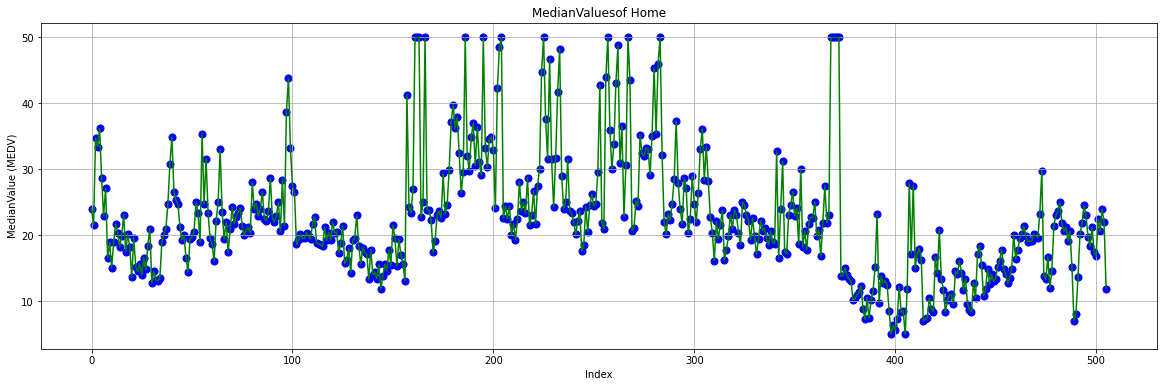

In [67]:
plt.figure(figsize=(20,6))
plt.scatter(dataframe.index, dataframe["MEDV"], color="blue", marker="o", s=50)
plt.plot(dataframe.index, dataframe["MEDV"], "g-")
plt.title("MedianValuesof Home")
plt.xlabel("Index")
plt.ylabel("MedianValue (MEDV)")
plt.grid(True)
plt.show()

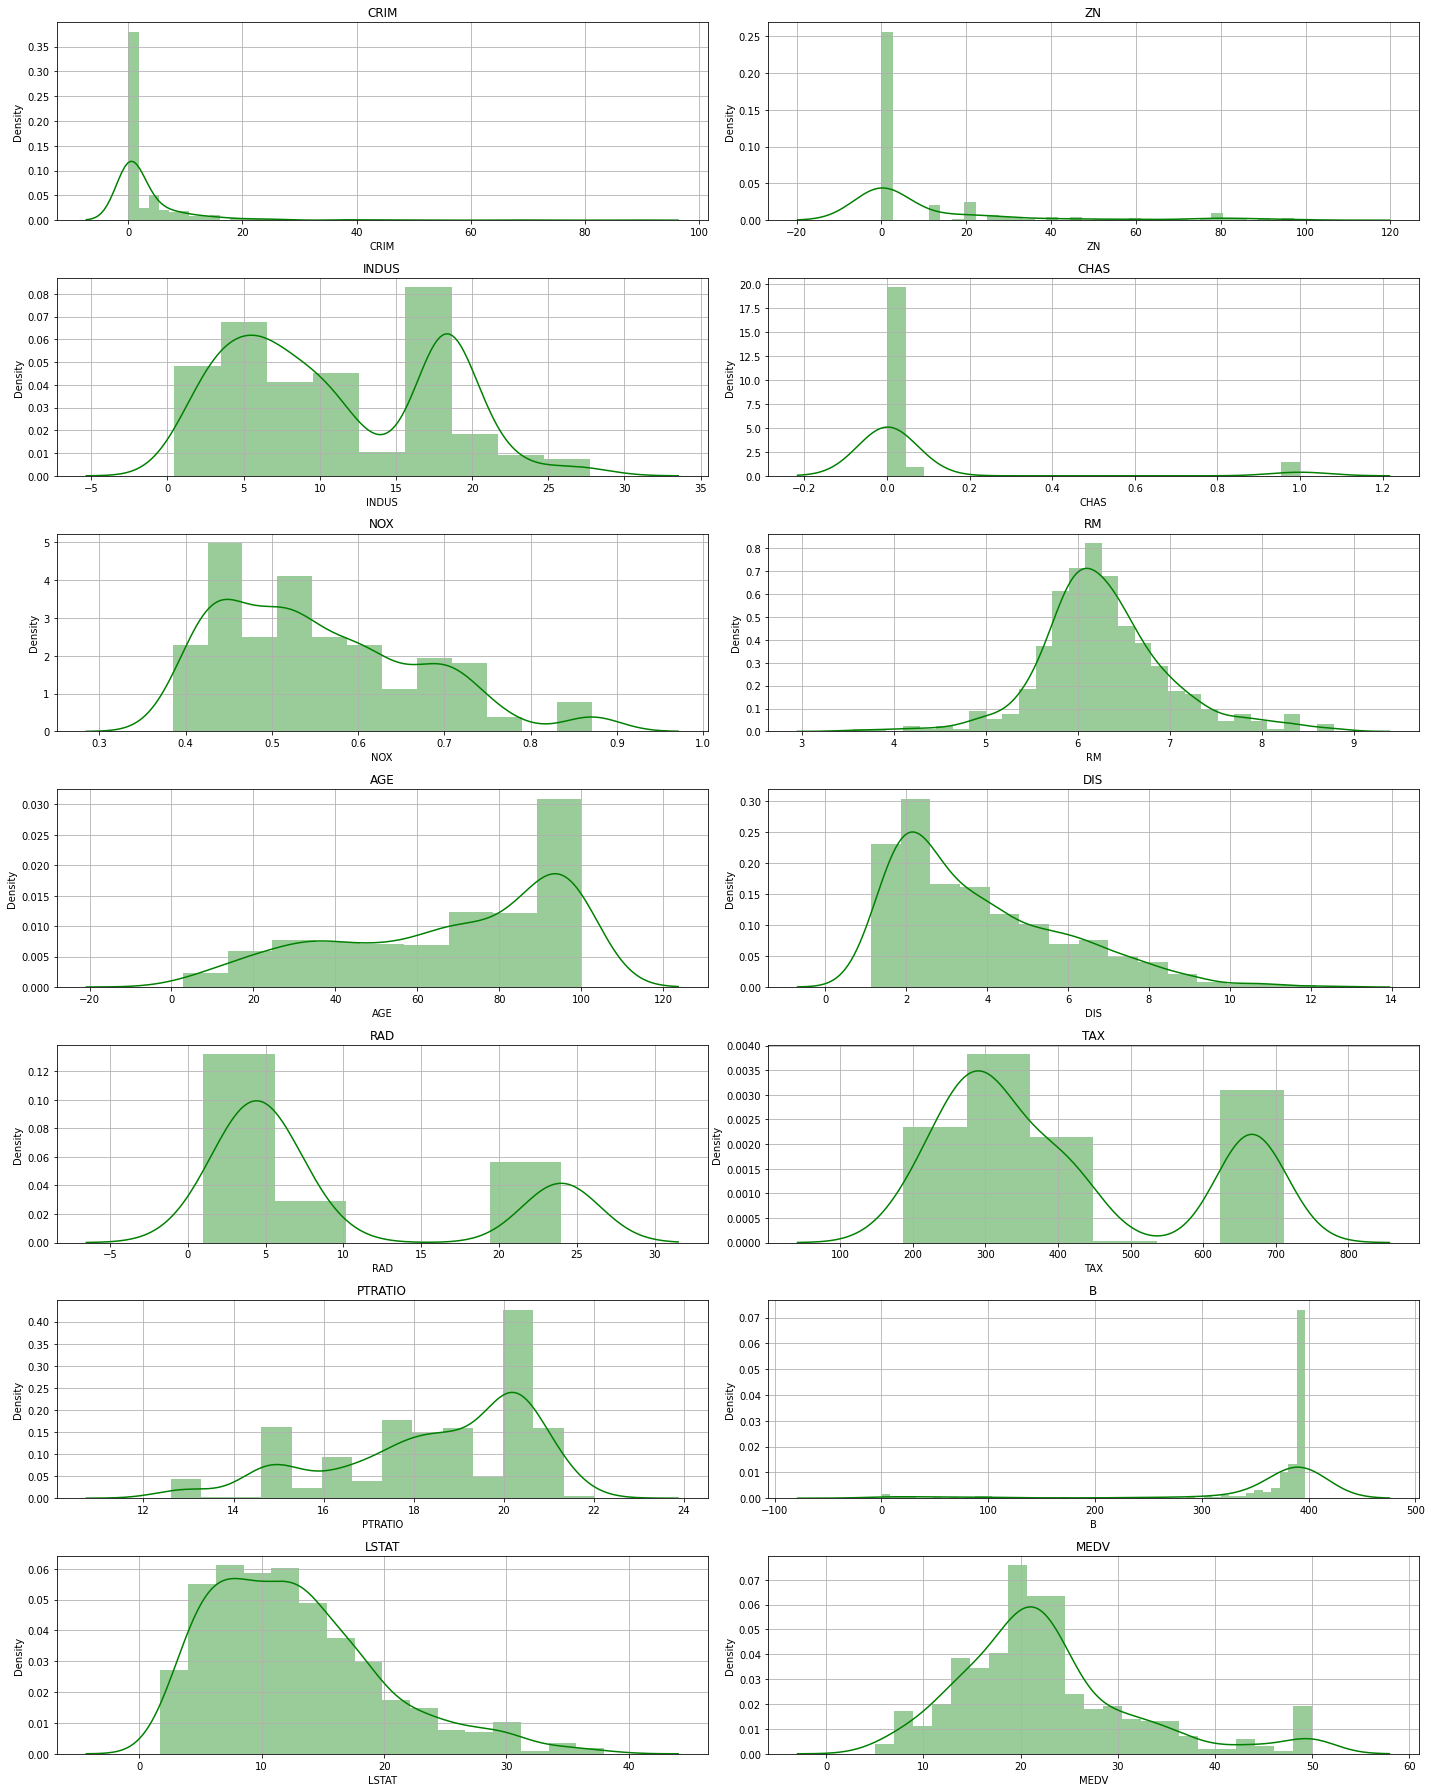

In [68]:
fig, axs = plt.subplots(7, 2, figsize=(20, 25))
axs = axs.ravel()
columns = list(dataframe.columns)

for i, column in enumerate(columns):
  sns.distplot(dataframe[column], ax=axs[i], color='green')
  axs[i].set_title(column)
  axs[i].grid(True)

plt.tight_layout()
plt.show()

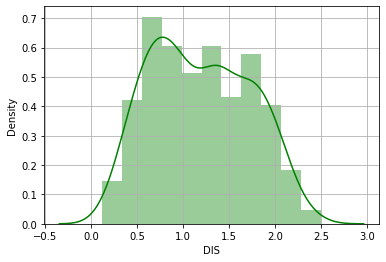

In [69]:
dataframe["DIS"] = np.log(dataframe["DIS"])

sns.distplot(dataframe["DIS"], color='green')
plt.grid(True)
plt.show()

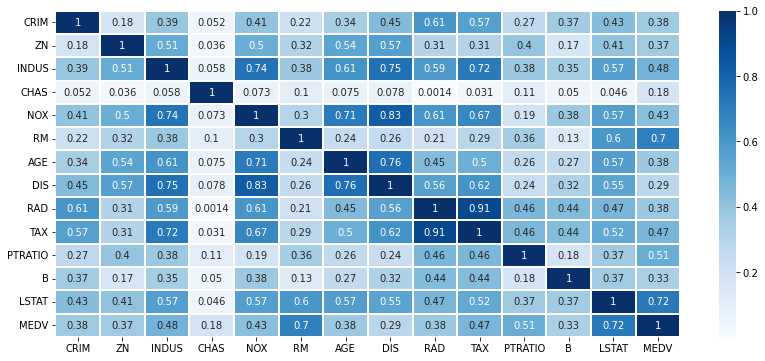

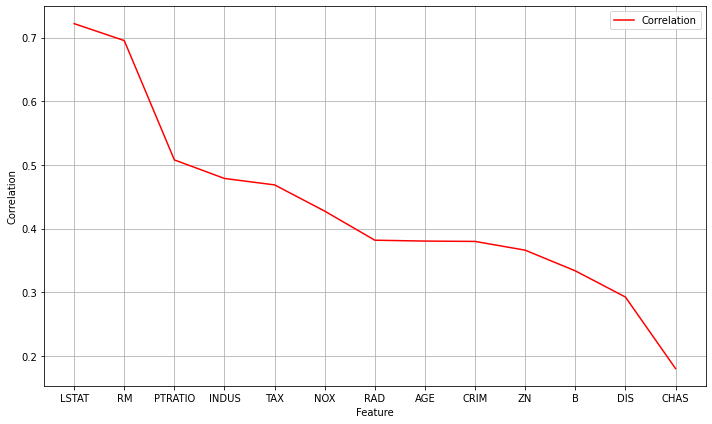

In [70]:
plt.figure(figsize=(14,6))
corr=abs(dataframe.corr())
sns.heatmap(corr,annot=True,linewidth=1,cmap="Blues")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(corr["MEDV"].sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [71]:
X=dataframe.iloc[:,0:13]
Y=dataframe.iloc[:,13]

print("Unscaled Data:")
print(X) 
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Scaled Data:")
print(X)  

Unscaled Data:
        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE       DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  1.408545    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  1.602836    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  1.602836    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  1.802073    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  1.802073    3  222   
..       ...   ...    ...   ...    ...    ...        ...       ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  0.907694    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  0.827460    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  0.773574    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  0.870833    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  0.918289    1  273   

     PTRATIO       B    

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=94)

In [73]:
Xgboost = xgb.XGBRegressor(objective='reg:squarederror') #without hyperparameter tuning
Xgboost.fit(X_train,Y_train)

#Generate predicted values
y_pred = Xgboost.predict(X_test)

mse=mean_squared_error(Y_test, y_pred)
score=r2_score(Y_test,y_pred)
print("Root Mean Square Error: %.2f" % (mse**(0.5)))
print("Accuracy: {} %".format(round((score*100),2)))    #accuracy

Root Mean Square Error: 2.91
Accuracy: 90.53 %


In [78]:
Xgboost = xgb.XGBRegressor(objective='reg:squarederror',  #with hyperparameter tuning
                        random_state=42,
                        max_depth=8,
                        learning_rate = 0.1,
                        n_estimators = 1000,
                        colsample_bylevel = 0.4,
                        reg_alpha = 0.5,
                        subsample = 0.8,
                       )

Xgboost.fit(X_train,Y_train)
y_pred = Xgboost.predict(X_test)
mse=mean_squared_error(Y_test, y_pred)
score=r2_score(Y_test,y_pred)
print("Root Mean Square Error: %.2f" % (mse**(0.5)))
print("Accuracy: {} %".format(round((score*100),2)))

Root Mean Square Error: 2.38
Accuracy: 93.66 %


In [75]:
parameter = { 'max_depth': [6,10],
           'learning_rate': [0.01, 0.08],
           'colsample_bylevel': [0.3, 0.4],
         }

Xgboost = xgb.XGBRegressor(seed=50, objective='reg:squarederror')
clfr = GridSearchCV(estimator=Xgboost, 
                   param_grid=parameter,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clfr.fit(X_train, Y_train)

print("Best parameters:", clfr.best_params_)
print("Lowest RMSE: ", (-clfr.best_score_)**(0.5))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'colsample_bylevel': 0.4, 'learning_rate': 0.08, 'max_depth': 10}
Lowest RMSE:  3.5810718674791286
